# Module 10 Challenge
## Glen Dagger

In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [39]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date)\
                .order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago_date)

# Perform a query to retrieve the date and precipitation scores
precipitation = session.query(Measurement.date,Measurement.prcp).\
                        filter(Measurement.date >= '2016-08-23').\
                        all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=["date","precipitation"])
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df.sort_values("date", inplace=True)

# Display first five rows
precipitation_df.head()

2016-08-23


,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


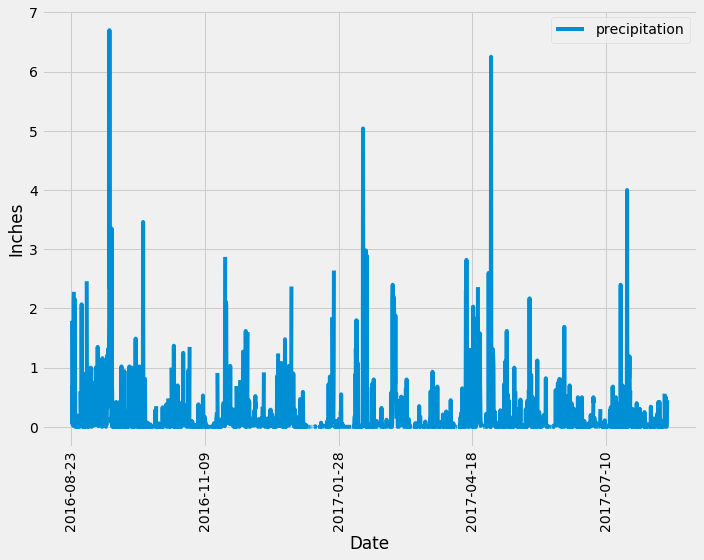

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(kind='line', y='precipitation', use_index=True, rot=90, figsize=(10,8))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()
plt.savefig('Images/precipitation_linechart.png')
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).distinct().count()

station_count

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# List the stations and the counts in descending order and assign first row
most_active_station = session.query(Measurement.station).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).\
                        first()

most_active_station

('USC00519281',)

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_station[0]

lowest_temp = session.query(func.min(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station_id).all()[0][0]

highest_temp = session.query(func.max(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station_id).all()[0][0]

avg_temp = session.query(func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station_id).all()[0][0]

print(f"Lowest temp: {lowest_temp}\nHighest temp: {highest_temp}\nAverage temp: {round(avg_temp,2)}")

Lowest temp: 54.0
Highest temp: 85.0
Average temp: 71.66


In [ ]:
# Using the most active station id, query the last 12 months of temperature observation data for this station
active_station_past_year = session.query(Measurement.tobs).\
                    filter(Measurement.station == most_active_station_id).\
                    filter(Measurement.date >= '2016-08-23').\
                    all()

# Save results as dataframe
tobs_df = pd.DataFrame(active_station_past_year, columns=['tobs'])

# Show first 5 rows of dataframe
tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


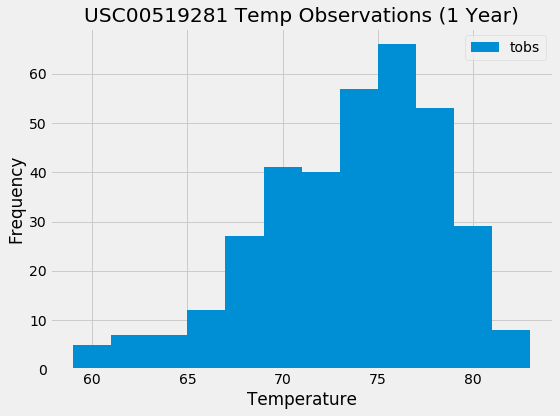

In [49]:
# Create histogram of tobs data with 12 bins
tobs_df.hist(bins=12, figsize=(8,6))

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"{most_active_station_id} Temp Observations (1 Year)")
plt.legend(["tobs"])
plt.tight_layout()
plt.savefig('Images/tobs_histogram.png')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()